# Secci√≥n 2: Introducci√≥n a ggplot2

## 2.1 Conceptos b√°sicos de ggplot2

### ggplot

Podemos cargar la librer√≠a `tidyverse` la cual contiene **ggplot, o cargar solo la librer√≠a como tal utilizando**

```r
library(ggplot2)
```

**ggplot2** es generalmente m√°s intuitiva para los principiantes es porque usa una gram√°tica de gr√°ficos, el *gg* de **ggplot2**.

ggplot2 es f√°cil para los principiantes es que su comportamiento por defecto se ha elegido cuidadosamente para satisfacer la gran mayor√≠a de los casos y, adem√°s, es visualmente agradable.

Una limitaci√≥n de ggplot2 es que est√° dise√±ado para trabajar exclusivamente con tablas de datos en formato *tidy* (donde las filas son observaciones y las columnas son variables).

Para usar ggplot2, tendr√°n que aprender varias funciones y argumentos. Estos pueden encontrarse en la [hoja de referencia de ggplot2](https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf).

### Los componentes de un gr√°fico

Los gr√°ficos en ggplot2 consisten en 3 componentes principales

- Data: Se refiere al conjunto de datos que se esta resumiendo
- Geometr√≠a: Tipo de diagrama que se esta representando (diagrama de dispersi√≥n, diagrama de caja, diagrama de barras, histograma, qqplot, densidad suave, etc)
- Mapeo est√©tico: variables asignadas a se√±ales visuales, como los valores y el color del eje x y el eje y

Tambi√©n tenemos componentes adicionales como:

- Escala
- Etiquetas, t√≠tulos, leyendas
- Temas/estilos

### Creando un nuevo gr√°fico

[1] "gg"     "ggplot"

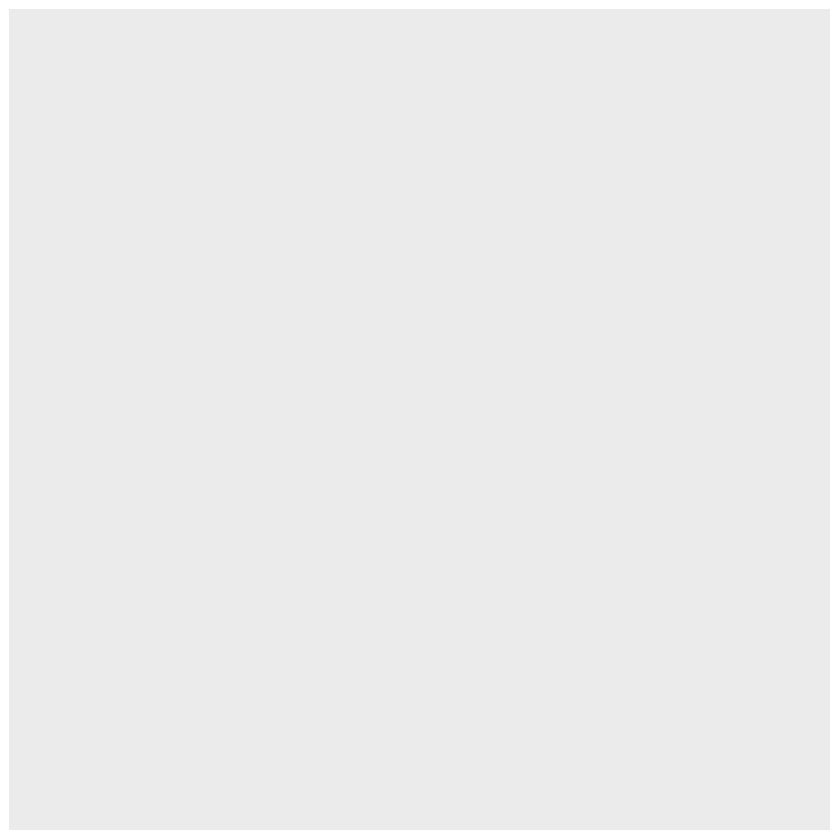

In [3]:
# Cargamos las librer√≠as a utilizar
library(tidyverse)
library(dslabs)

# Cargamos los datos
data(murders)

# Asociamos los datos con el objeto ggplot
p <- ggplot(data = murders) # Asignamos el gr√°fico a un objeto, de lo contrario se ejecutara inmediatamente

# Podemos observar la clase de nuestro objeto
class(p)

# Podemos mostrar nuestro gr√°fico utilizando print() o simplemente llam√°ndolo p
p

> Otra forma de asignar los datos es utilizando el pipe `murders %>% ggplot()` 

El c√≥digo crea un gr√°fico, en este caso una pizarra en blanco ya que no se ha definido la geometr√≠a. La √∫nica opci√≥n de estilo que vemos es un fondo gris.

## 2.2 personalizaci√≥n de gr√°ficos

### Capas

En ggplot2 creamos gr√°ficos agregando capas (layers en ingl√©s). Las capas pueden definir geometr√≠as, calcular estad√≠sticas de resumen, definir qu√© escalas (scales en ingl√©s) usar o incluso cambiar estilos. Para a√±adir capas, usamos el s√≠mbolo +. En general, una l√≠nea de c√≥digo se ver√° as√≠:

```r
datos %>% ggplot() + CAPA 1 + CAPA 2 + ... + CAPA N
```
Usualmente, la primera capa que agregamos define la geometr√≠a. Los nombres de las funciones de geometr√≠a siguen el patr√≥n: `geom_X` donde `X` es el nombre de la geometr√≠a. Algunos ejemplos incluyen `geom_point`, `geom_bar` y `geom_histogram`.

Los mapeos est√©ticos (aesthetic mappings en ingl√©s) describen c√≥mo las propiedades de los datos se conectan con las caracter√≠sticas del gr√°fico, como la distancia a lo largo de un eje, el tama√±o o el color. La funci√≥n `aes()` conecta los datos con lo que vemos en el gr√°fico mediante la definici√≥n de asignaciones est√©ticas y, por eso, ser√° una de las funciones que m√°s utilizar√°n al gr√°ficar.

`aes()` tambi√©n usa los nombres de variables del componente objeto: podemos usar `population` y `total` sin tener que llamarlos como `murders$population` y `murders$total`. El comportamiento de reconocer las variables del componente de datos es espec√≠fico a aes. Con la mayor√≠a de las funciones, si intentan acceder a los valores de `population` o `total` fuera de `aes`, recibir√°n un error.

`geom_point()` Crea un scatterplot y requiere mapeos est√©ticos `x` e `y`.

Las funciones `geom_label` y `geom_text` nos permiten a√±adir texto al gr√°fico con o sin un rect√°ngulo detr√°s del texto, respectivamente(tambi√©n requieren mapeos est√©ticos).

Podemos agregar capas con diferentes asignaciones est√©ticas al mismo gr√°fico.

Veamos como quedar√≠a nuestro gr√°fico utilizando estas capas


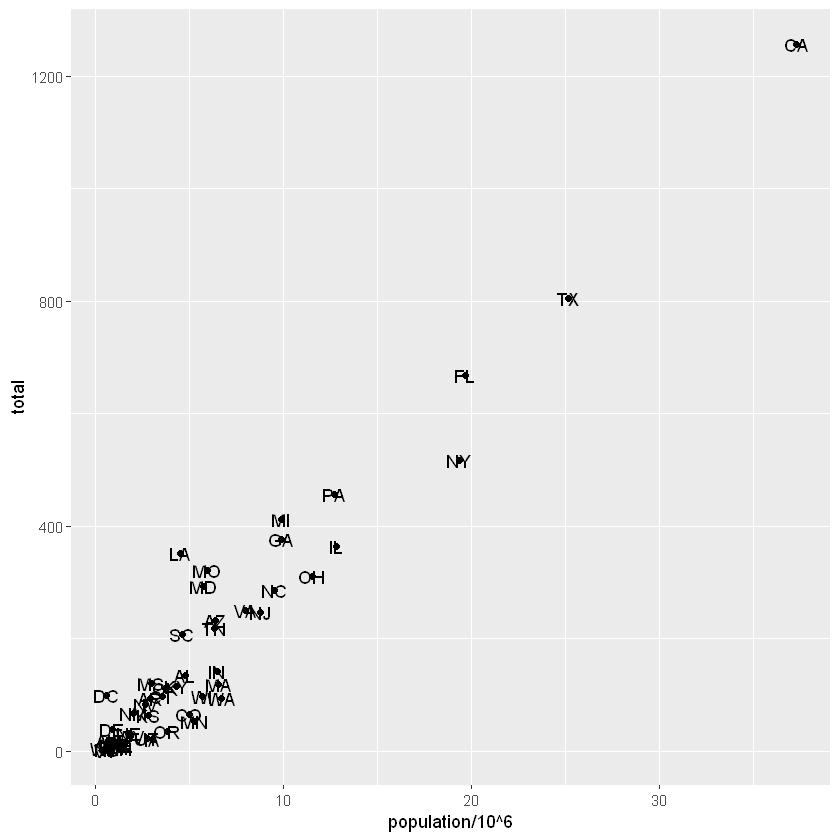

In [5]:
# Cargamos las librer√≠as y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders)

# # A√±adimos las capas
p + geom_point(aes(population/10^6, total)) + # primer capa (el scatterplot)
    geom_text(aes(population/10^6, total, label = abb)) # segunda capa (los indicadores de texto)

### Retocando

Cada funci√≥n de geometr√≠a tiene muchos otros argumentos adem√°s de aes y data. Estos suelen ser espec√≠ficos de la funci√≥n(Por lo que ser√° necesario revisar la documentaci√≥n).

Algunos ejemplos son:

`size`: Nos ayuda a definir el tama√±o de los puntos(En `geom_point`).

`nudge_x` : Mueve el texto ligeramente hacia la derecha o hacia la izquierda(En `geom_text`)

Estos no son un mapeo: mientras los mapeos usan datos de observaciones espec√≠ficas y necesitan estar dentro de `aes()`, las operaciones que queremos que afecten a todos los puntos de la misma manera no necesitan ser incluidas dentro `aes`.

Otra opci√≥n a tener en cuenta son los mapeos globales, los cuales nos ayudan a evitar repetir mapeos que ser√°n utilizados por varias geometr√≠as. Estos mapeos globales son definidos directamente en la funci√≥n `ggplot()`.

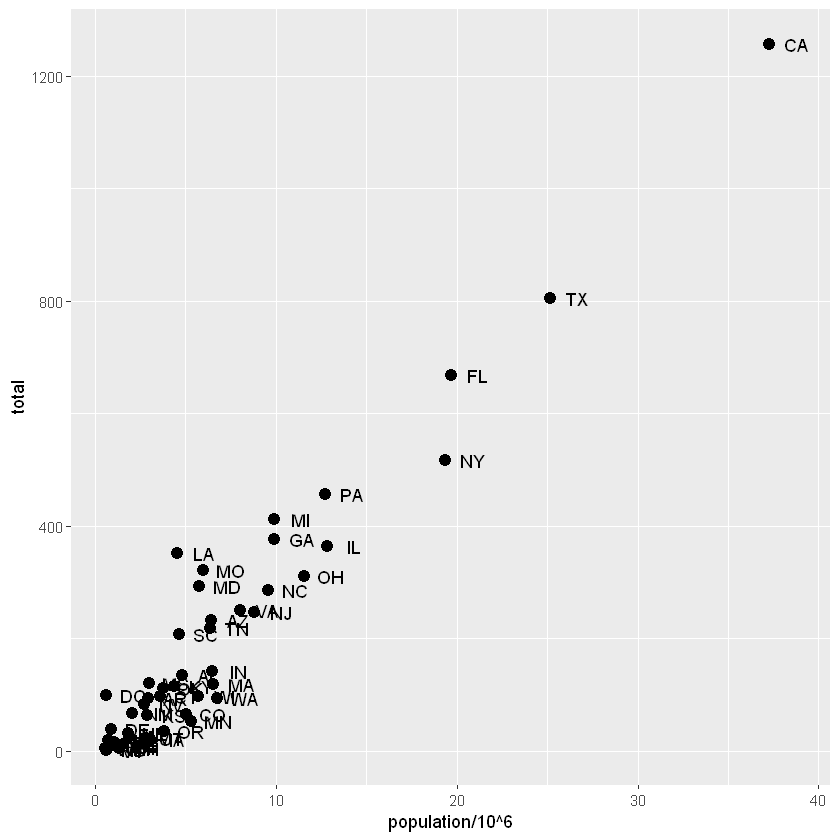

In [11]:
# Mapeo local
# Cargamos las librer√≠as y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders)

# # A√±adimos las capas
p + geom_point(aes(population/10^6, total), size = 3) + # primer capa (el scatterplot)
    geom_text(aes(population/10^6, total, label = abb), nudge_x = 1.5) # segunda capa (los indicadores de texto)

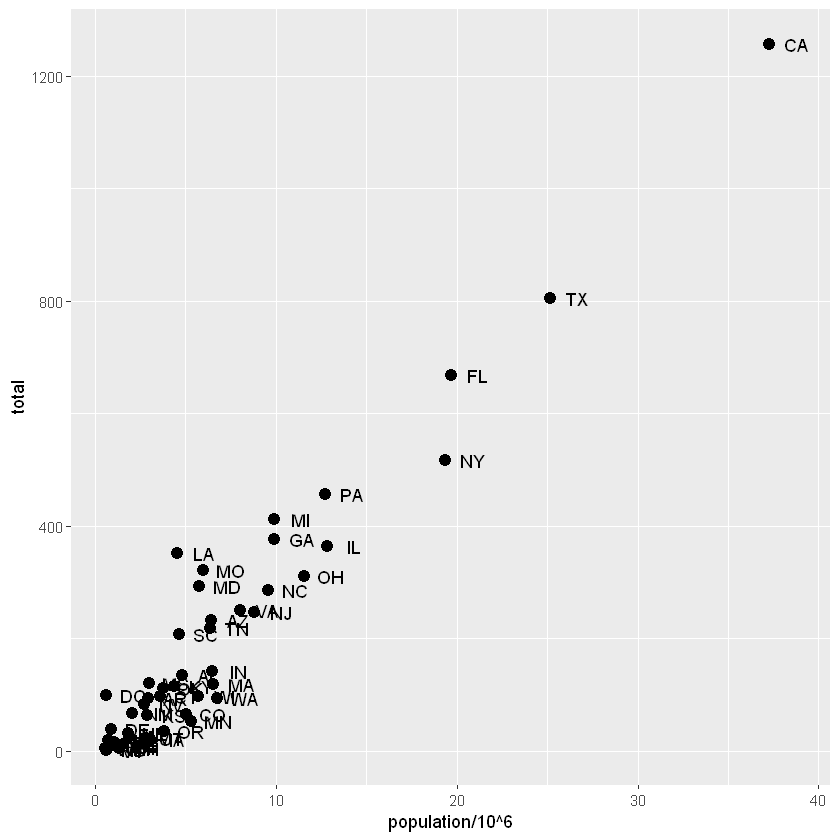

In [12]:
# Mapeo global
# Cargamos las librer√≠as y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(murders)

# Definimos nuestro objeto ggplot con los datos
p <- ggplot(data = murders, aes(population/10^6, total, label = abb))

# # A√±adimos las capas
p + geom_point(size = 3) + # primer capa (el scatterplot)
    geom_text(nudge_x = 1.5) # segunda capa (los indicadores de texto)

Obtendremos el mismo gr√°fico, ya que las entradas del mapeo global que no sean necesarias para una capa ser√°n ignoradas

> Si agregamos un mapeo a una capa este sobrescribir√° el mapeo global, por lo que conservara el valor que le asignemos exclusivamente a ella

### Escalas, etiquetas y colores

#### Escalas

Primero, las escalas que queremos est√°n en escala logar√≠tmica. Este no es el valor predeterminado, por lo que este cambio debe a√±adirse a trav√©s de una capa de escalas.

La funci√≥n `scale_x_continuous` nos permite controlar el comportamiento de las escalas. La usamos as√≠:

```r
p + geom_point(size = 3) +
geom_text(nudge_x = 0.05) +
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10")
```

> Debido al cambio de escala, debemos cambiar el ajuste a la posici√≥n

Esta transformaci√≥n particular es tan com√∫n que ggplot2 ofrece dos funciones especializadas `scale_x_log10` y `scale_y_log10`

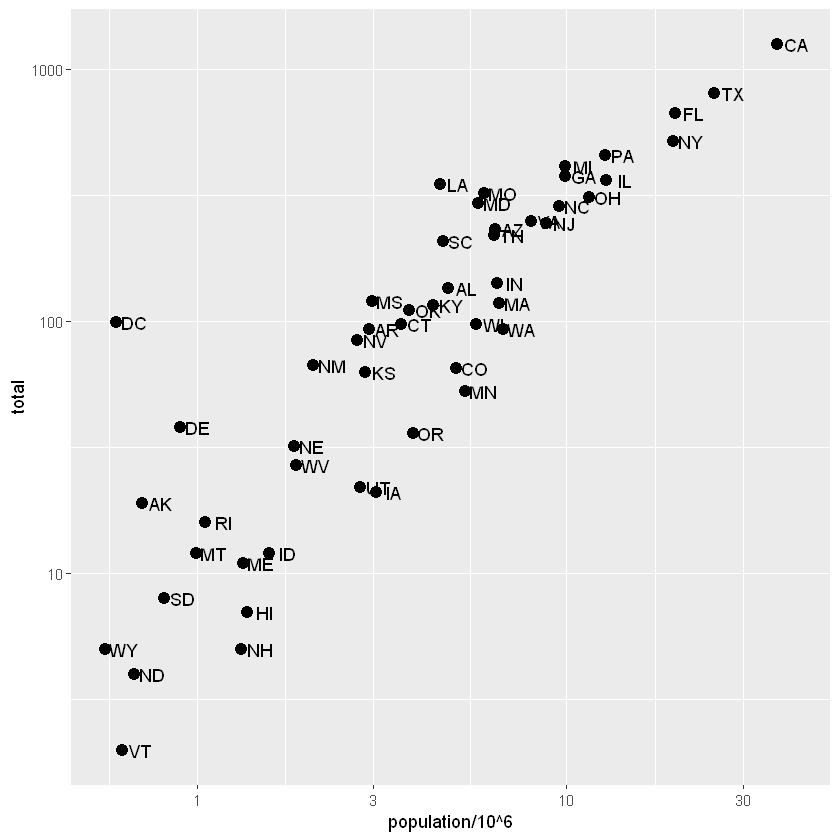

In [14]:
p + geom_point(size = 3) +
    geom_text(nudge_x = 0.05) +
    scale_x_log10() + # Cambiamos la base del eje x
    scale_y_log10() # Cambiamos la base del eje y

#### Etiquetas y t√≠tulos

Agregar etiquetas y t√≠tulos tambi√©n requiere agregar capas de la siguiente manera

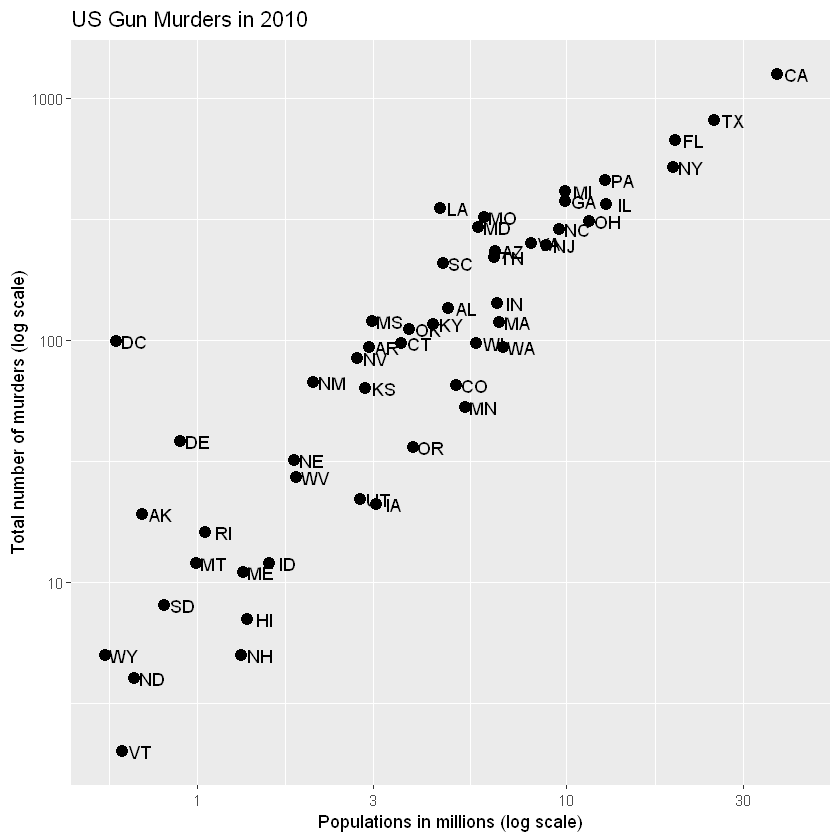

In [15]:
p + geom_point(size = 3) +
geom_text(nudge_x = 0.05) +
scale_x_log10() +
scale_y_log10() +
xlab("Populations in millions (log scale)") + # Etiqueta del eje x
ylab("Total number of murders (log scale)") + # Etiqueta del eje y
ggtitle("US Gun Murders in 2010") # Titulo

#### Categor√≠as como colores

Podemos cambiar el color de los puntos usando el argumento col en la funci√≥n `geom_point`. Para facilitar la demostraci√≥n de caracter√≠sticas nuevas, redefiniremos `p` para ser todo excepto la capa de puntos:

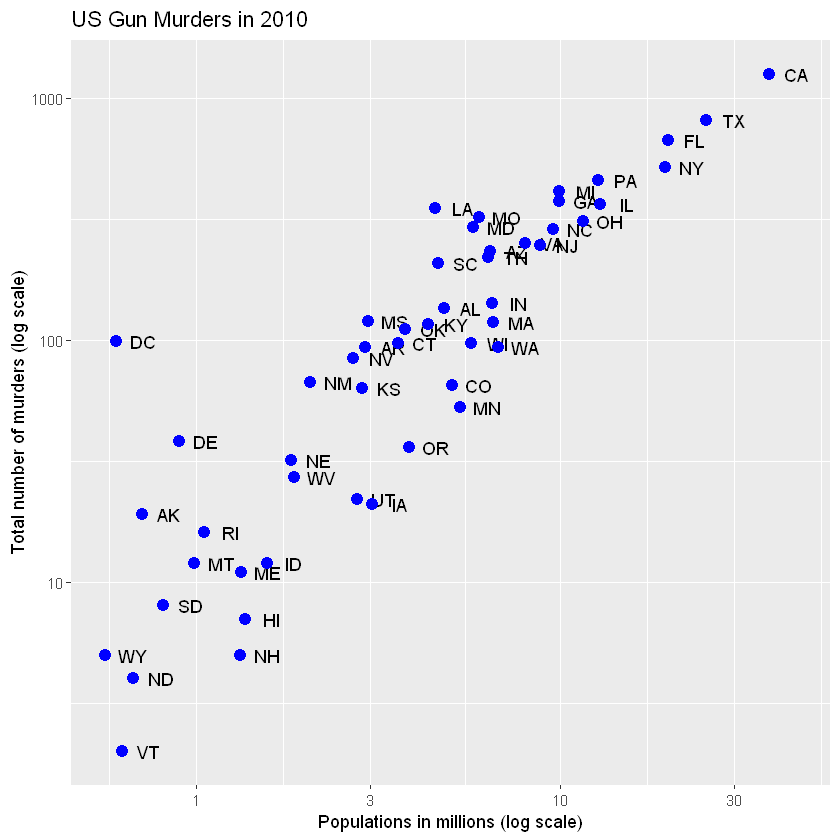

In [18]:
# Asignamos todo el gr√°fico a p, excepto la capa geom_point
p <- murders %>% ggplot(aes(population/10^6, total, label = abb)) +
geom_text(nudge_x = 0.075) +
scale_x_log10() +
scale_y_log10() +
xlab("Populations in millions (log scale)") +
ylab("Total number of murders (log scale)") +
ggtitle("US Gun Murders in 2010")

# Cambiamos el color de los puntos a azul
p + geom_point(size = 3, col = "blue")

Pero nosotros queremos asignar color seg√∫n la regi√≥n geogr√°fica. 

Un buen comportamiento por defecto de `ggplot2` es que si asignamos una variable categ√≥rica al color, autom√°ticamente asigna un color diferente a cada categor√≠a, adem√°s de una leyenda. 

Dado que la elecci√≥n del color est√° determinada por una caracter√≠stica de cada observaci√≥n, este es un mapeo est√©tico. Para asignar un color a cada punto, necesitamos usar `aes`.

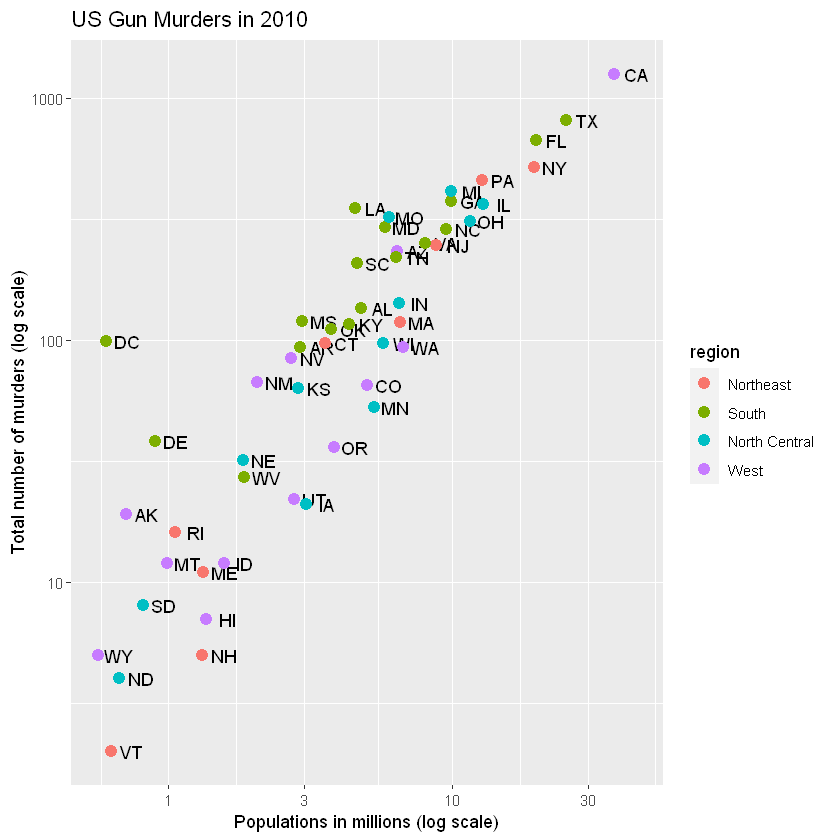

In [19]:
# Cambiamos el color por categor√≠a
p + geom_point(aes(col = region), size = 3)

### Anotaci√≥n, formas y ajustes

A menudo queremos a√±adir formas o anotaciones a las figuras que no se derivan directamente del mapeo est√©tico; algunos ejemplos incluyen etiquetas, cuadros, √°reas sombreadas y l√≠neas.

Aqu√≠ queremos a√±adir una l√≠nea que represente la tasa promedio de asesinatos en todo el pa√≠s. Una vez que determinemos la tasa por mill√≥n a ser ùëü, esta l√≠nea se define por la f√≥rmula: ùë¶ = ùëüùë•, con ùë¶ y ùë• nuestros ejes: asesinatos totales y poblaci√≥n en millones, respectivamente.
En la escala logar√≠tmica, esta l√≠nea se convierte en: log(ùë¶) = log(ùëü) + log(ùë•). Entonces, en nuestro gr√°fico, es una l√≠nea con pendiente 1 e intercepto log(ùëü). Para calcular este valor, utilizamos:

In [23]:
# Definimos la tasa promedio de asesinatos
r <- murders %>%
summarize(rate = sum(total)/ sum(population) * 10^6) %>%
pull(rate)


Para a√±adir una l√≠nea, usamos la funci√≥n `geom_abline`. `ggplot2` utiliza `ab` en el nombre para recordarnos que estamos suministrando el intercepto (a) y el pendiente (b). La l√≠nea predeterminada tiene pendiente 1 e intercepto 0, por lo que solo tenemos que definir el intercepto:

```r
p + geom_point(aes(col=region), size = 3) +
geom_abline(intercept = log10(r))
```

Aqu√≠ `geom_abline` no utiliza ninguna informaci√≥n del objeto de datos.
Podemos cambiar el tipo de l√≠nea y el color de las l√≠neas usando argumentos. Adem√°s, la dibujamos primero para que no tape nuestros puntos.

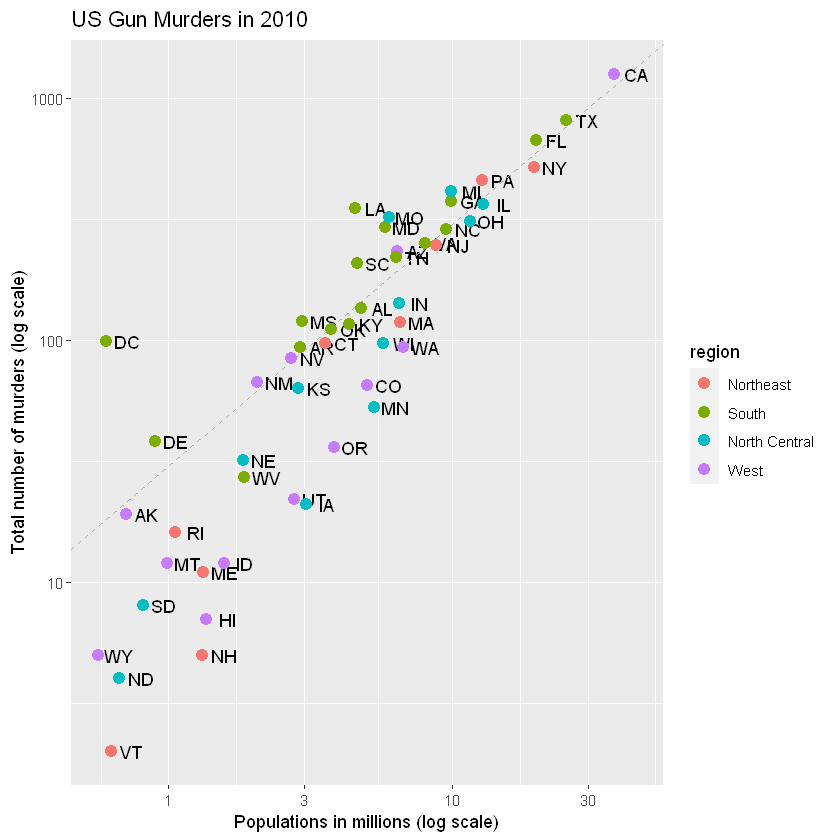

In [24]:
# Agregamos la linea
p <- p + geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
    geom_point(aes(col=region), size = 3)

p

Con frecuencia necesitamos hacer peque√±os ajustes al comportamiento predeterminado. 

Por ejemplo, podemos hacer cambios a la leyenda a trav√©s de la funci√≥n `scale_color_discrete`. En nuestro gr√°fico original, la palabra regi√≥n est√° en min√∫scula y podemos cambiarla as√≠:

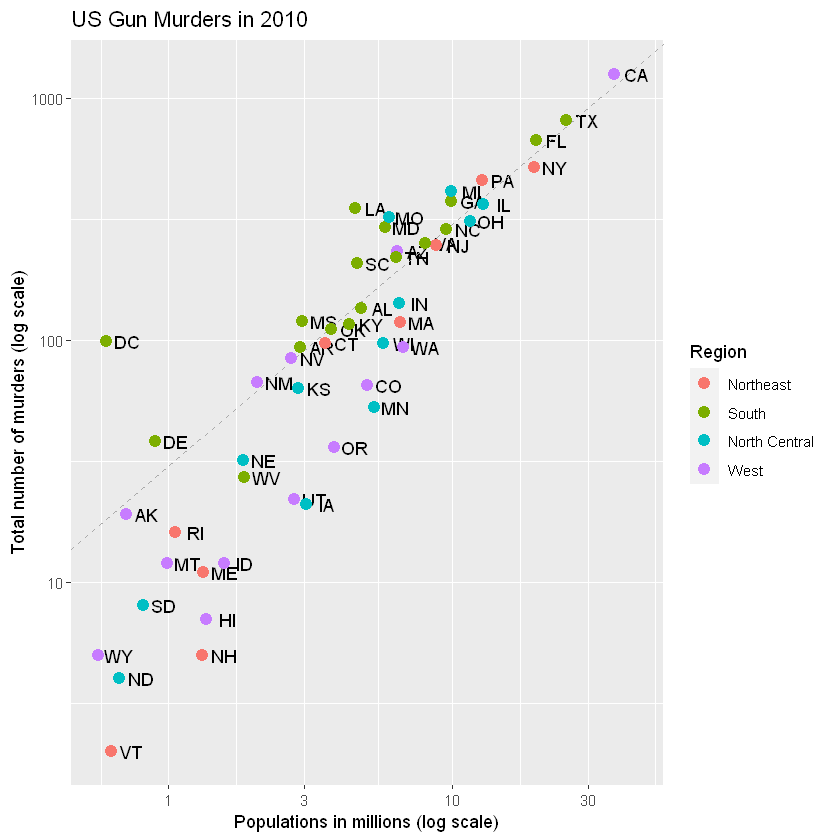

In [25]:
p <- p + scale_color_discrete(name = "Region")
p

### Paquetes complementarios

El poder de ggplot2 se incrementa a√∫n m√°s debido a la disponibilidad de paquetes adicionales

El estilo de un gr√°fico ggplot2 se puede cambiar usando las funciones de `theme`.

Algunos temas son incluidos en la librer√≠a `dslabs`, los cuales pueden ser cambiados utilizando

```r
ds_theme_set()
```

El paquete `ggthemes` a√±ade muchos otros temas, incluso el tema `theme_economist` que escogimos, para utilizarlo es necesario agregar una nueva capa a nuestro gr√°fico

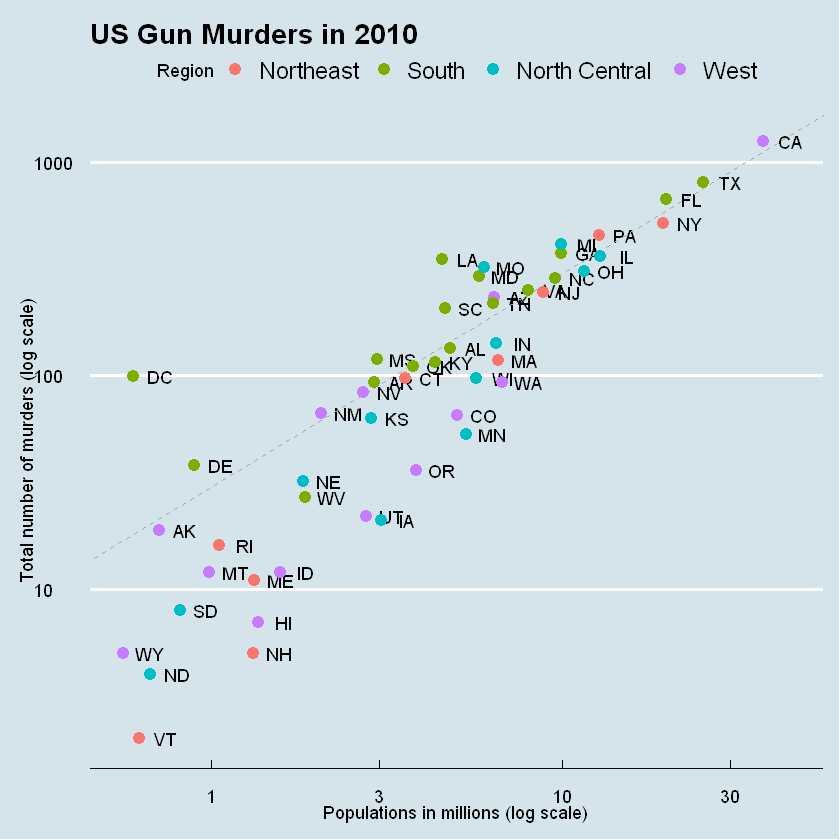

In [29]:
library(ggthemes) # cargamos la librer√≠a con los temas
p + theme_economist() # Agregamos la capa del tema

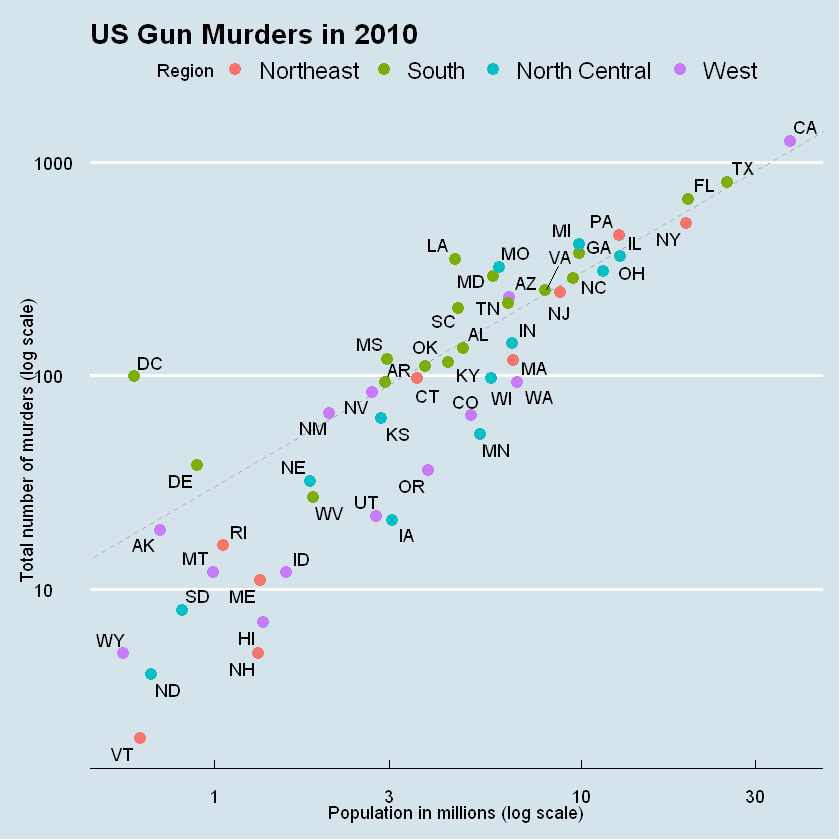

In [32]:
# Cargamos las librer√≠as necesarias
library(tidyverse)
library(ggrepel)
library(ggthemes)
library(dslabs)

# Seleccionamos los datos
data(murders)

# Definimos el intercepto
r <- murders %>%
    summarize(rate = sum(total) / sum(population) * 10^6) %>%
    .$rate
    
# Creamos el gr√°fico
murders %>% # Enlazamos los datos al gr√°fico
    ggplot(aes(population/10^6, total, label = abb)) + # Definimos el mapeo global
    geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") + # Agregamos el intercepto
    geom_point(aes(col = region), size = 3) + # Creamos el scatterplot
    geom_text_repel() + # Agregamos los marcadores de texto sin superposici√≥n
    scale_x_log10() + # Ajustamos la escala de x
    scale_y_log10() + # Ajustamos la escala de y
    xlab("Population in millions (log scale)") + # Agregamos la etiqueta de x
    ylab("Total number of murders (log scale)") + # Agregamos la etiqueta de y
    ggtitle("US Gun Murders in 2010") + # Agregamos el t√≠tulo del gr√°fico
    scale_color_discrete(name = "Region") + # Corregimos el nombre de las acotaciones
    theme_economist() # Agregamos el tema de econom√≠a

### Otros gr√°ficos


- `geom_histogram()` crea un histograma.
    - `binwidth`: Cambia el ancho de las barras(bins).
    - `fill`: Cambia el color de relleno.
    - `col`: Cambia el color del contorno.

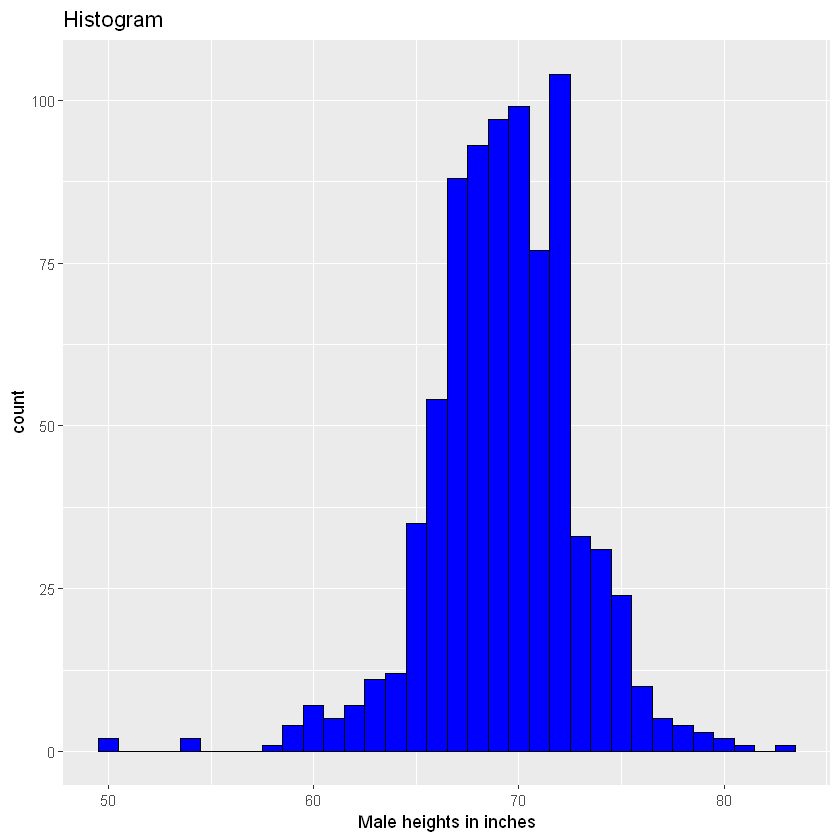

In [34]:
# Cargamos las librer√≠as necesarias y seleccionamos los datos
library(tidyverse)
library(dslabs)
data(heights)

# definimos nuestro objeto ggplot
p <- heights %>%
    filter(sex == "Male") %>%
    ggplot(aes(x = height))

# Creamos un histograma con relleno azul, contorno negro con etiquetas y titulo
p1 <- p + geom_histogram(binwidth = 1, fill = "blue", col = "black") +
    xlab("Male heights in inches") +
    ggtitle("Histogram")
p1

- `geom_density()`: Crea un gr√°fico de densidad suave.
    - `fill`: Cambia el color de relleno.

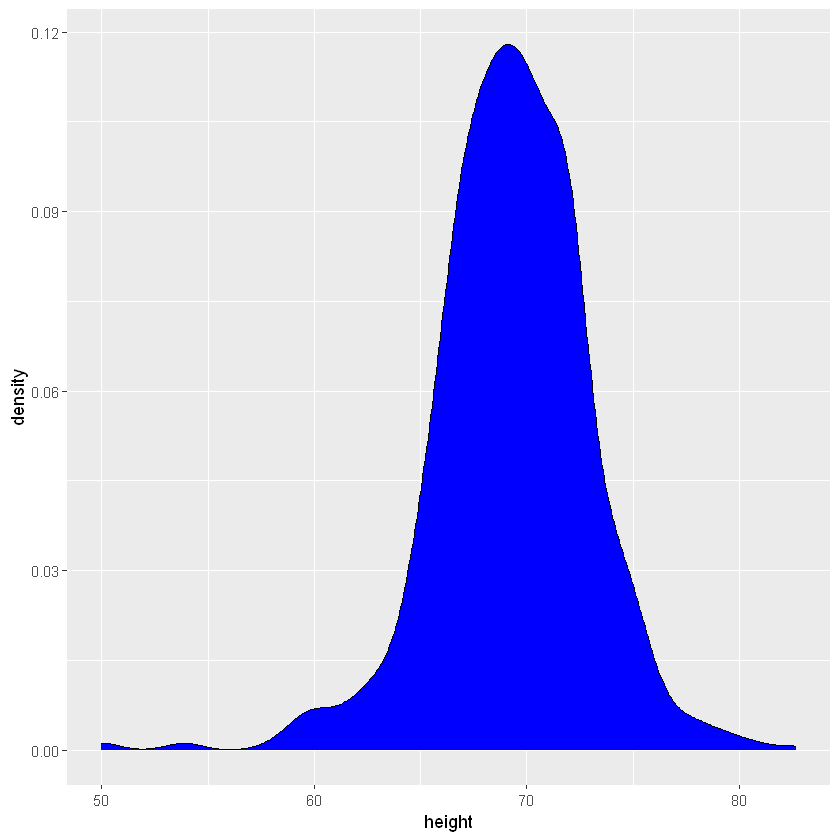

In [35]:
# Creamos un gr√°fico de densidad con relleno azul
p2 <- p + geom_density(fill = "blue")
p2

- `geom_qq()`: Crea un gr√°fico cuantil-cuantil (Q-Q).
    - De forma predeterminada, los datos se comparan con una distribuci√≥n normal est√°ndar con una media de 0 y una desviaci√≥n est√°ndar de 1. Esto se puede cambiar con el argumento `dparams` o se puede escalar la muestra de datos.

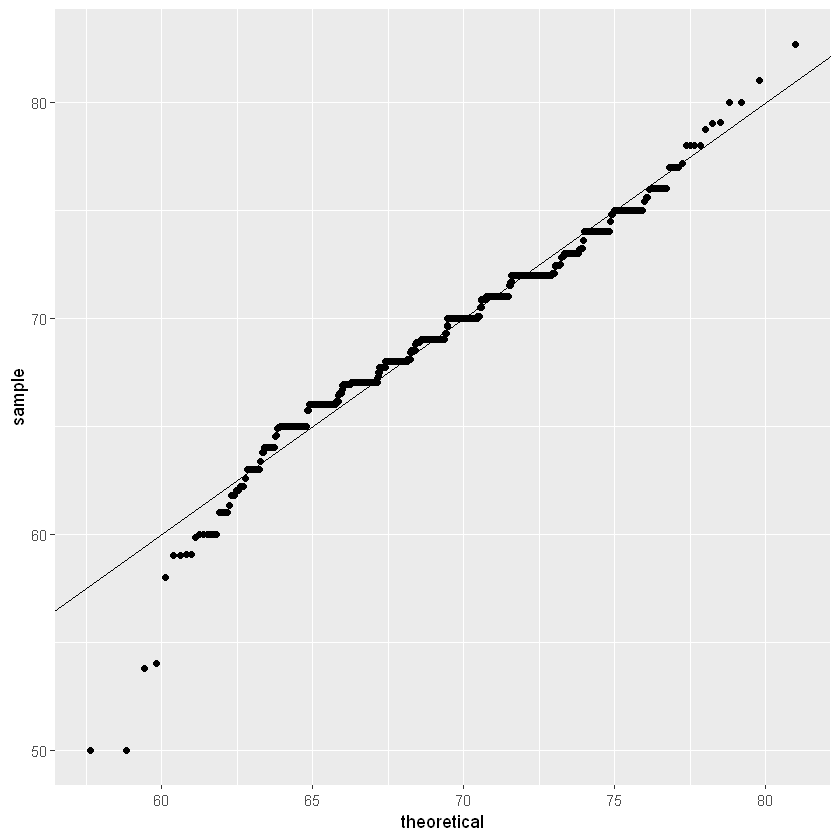

In [39]:
# Creamos un QQ-plot con una distribuci√≥n normal con la misma media/SD que los datos
p <- heights %>% filter(sex == "Male") %>%
    ggplot(aes(sample = height))
params <- heights %>%
    filter(sex == "Male") %>%
    summarize(mean = mean(height), sd = sd(height))
p3 <- p + geom_qq(dparams = params) +
    geom_abline()
p3

Los gr√°ficos se pueden organizar uno al lado de otro usando la funci√≥n `grid.arrange()` del paquete `gridExtra`. Primero, cree los gr√°ficos y gu√°rdelos en objetos (p1, p2, ...). Luego pase los objetos a `grid.arrange()`.

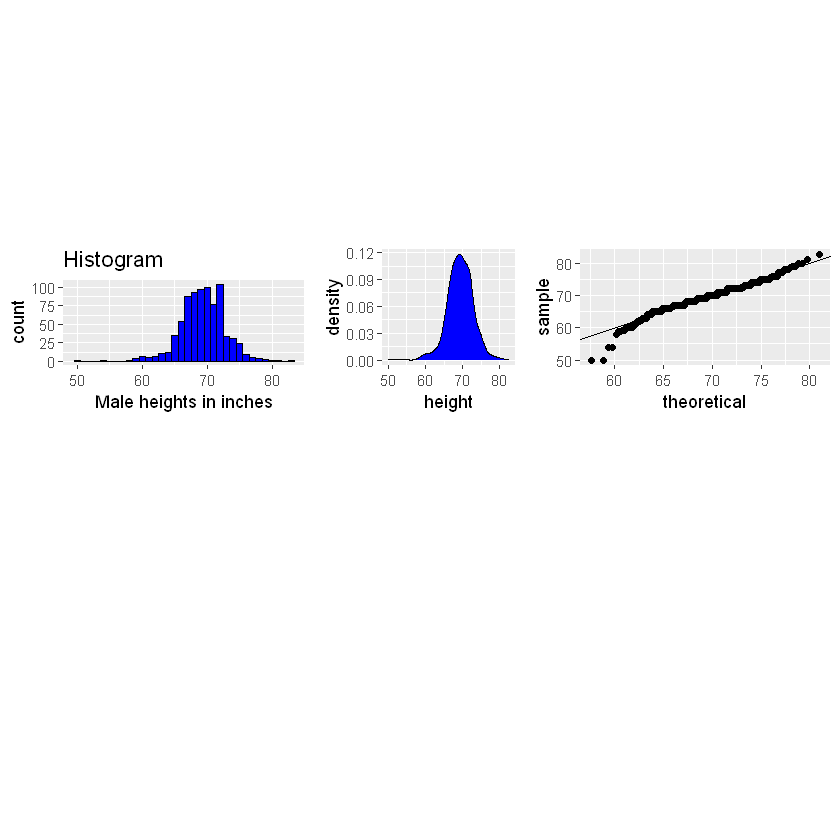

In [49]:
# Juntamos los tres gr√°ficos en un arreglo de 1 fila y 3 columnas.
library(gridExtra)
grid.arrange(p1, p2, p3, ncol = 3, widths = c(3, 2, 3), heights = unit(c(1.5, 1.5), "inch"))

## Evaluaci√≥n 2: Introducci√≥n a `ggplot2`

### Ejercicio 1: Lo b√°sico de ggplot2

Comience cargando los paquetes `dplyr` y `ggplot2`, as√≠ como los datos `murders` y `heights`.

```r
library(dplyr)
library(ggplot2)
library(dslabs)
data(heights)
data(murders)
```

Con ggplot2, los gr√°ficos se pueden guardar como objetos. Por ejemplo, podemos asociar un set de datos con un objeto de gr√°fico as√≠:

```r
p <- ggplot(data = murders)
```

Como data es el primer argumento, no necesitamos explicarlo:

```r
p <- ggplot(murders)
```

y tambi√©n podemos usar el pipe:

```r
p <- murders %>% ggplot()
```

¬øCu√°l es la clase del objeto p?

In [50]:
source("./Scripts/2/Ejercicio1.r", print.eval = TRUE)

[1] "gg"     "ggplot"


### Ejercicio 2: pipes

Usando el pipe `%>%`, cree un objeto p pero esta vez asociado con el set de datos `heights` en lugar del set de datos `murders`.

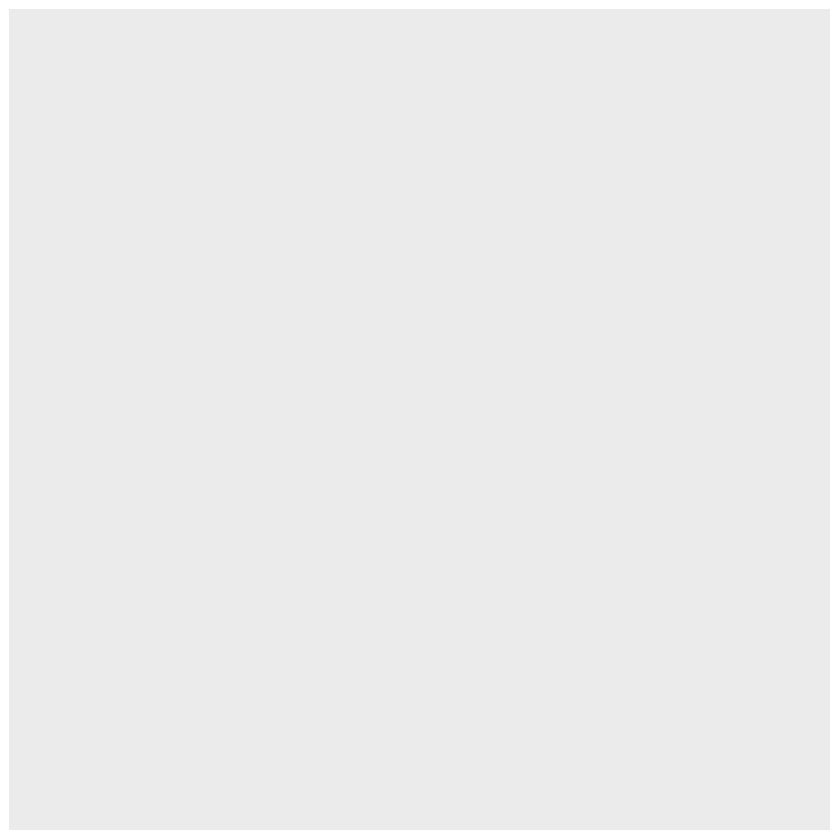

In [51]:
source("./Scripts/2/Ejercicio2.r", print.eval = TRUE)

### Ejercicio 3: `geom_point` 1

Para crear el diagrama de dispersi√≥n, agregamos una capa con `geom_point`. Los mapeos est√©ticos requieren que definamos las variables del eje-x y del eje-y, respectivamente. 

Entonces el c√≥digo se ve as√≠:

```r
murders %>% ggplot(aes(x = , y = )) +
geom_point()
```

excepto que tenemos que definir las dos variables x e y. 

Llene el espacio con los nombres correctos de las variables.

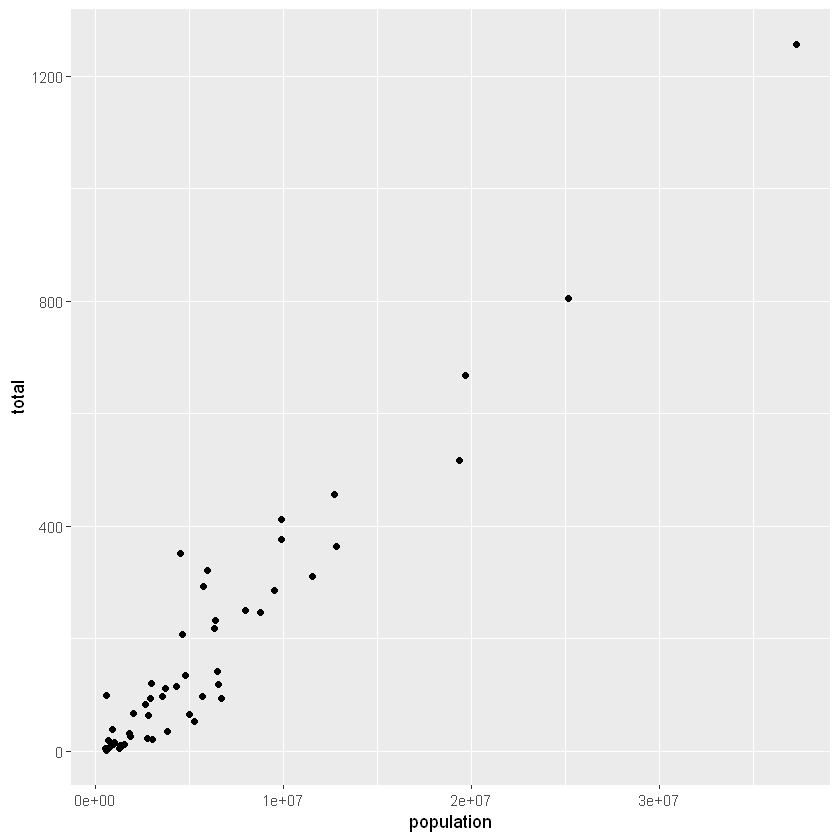

In [52]:
source("./Scripts/2/Ejercicio3.r", print.eval = TRUE)

### Ejercicio 4: `geom_point` 2

Recuerde que si no usamos nombres de argumentos, podemos obtener el mismo gr√°fico si ingresamos los nombres de las variables en el orden correcto de esta manera:

```r
murders %>% ggplot(aes(population, total)) +
geom_point()
```

Vuelva a hacer el gr√°fico pero ahora con total en el eje-x y poblaci√≥n en el eje-y.

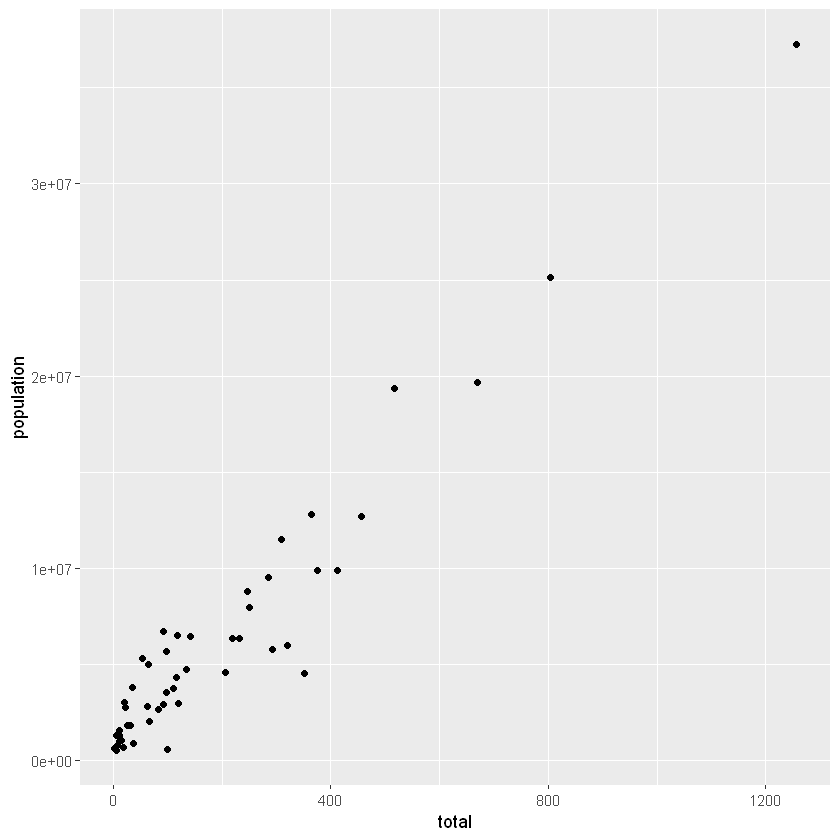

In [53]:
source("./Scripts/2/Ejercicio4.r", print.eval = TRUE)

### Ejercicio 5: `geom_point` text

Reescriba el c√≥digo

```r
murders %>% ggplot(aes(population, total)) + geom_label()
```

para que use abreviaturas como el `label` (la etiqueta) a trav√©s de `aes`.

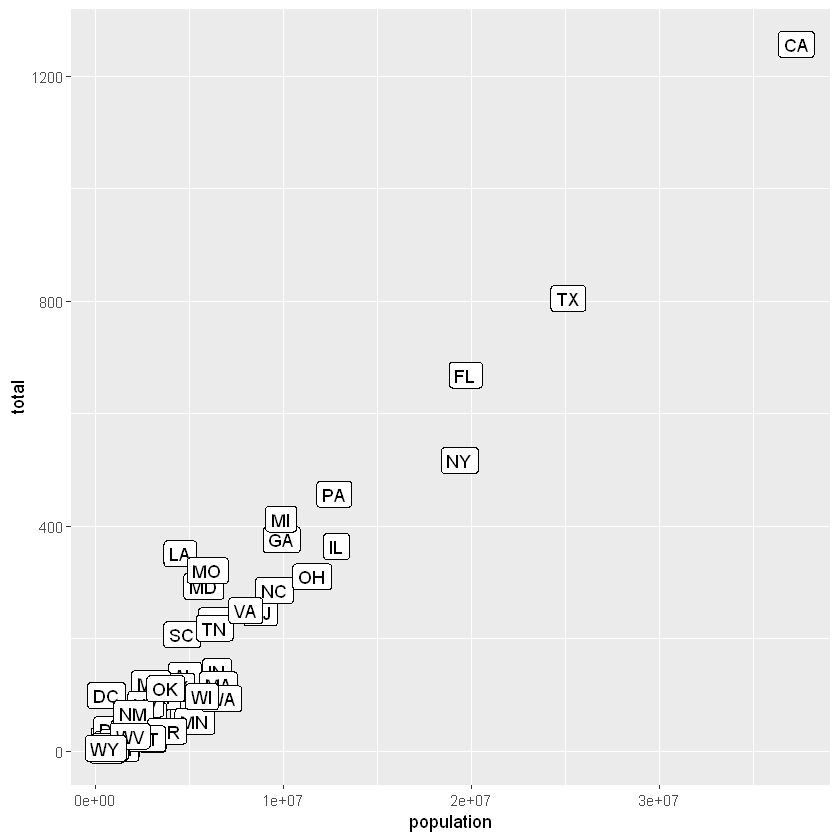

In [54]:
source("./Scripts/2/Ejercicio5.r", print.eval = TRUE)

### Ejercicio 6: `geom_point` colors 2

Reescriba el c√≥digo anterior para que las etiquetas sean azules.

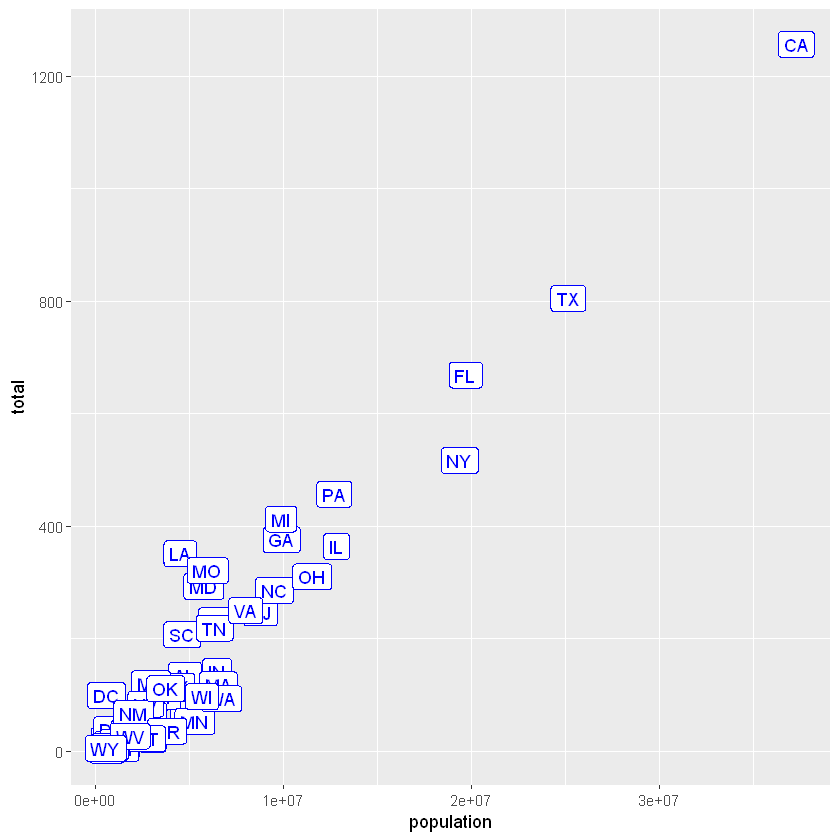

In [55]:
source("./Scripts/2/Ejercicio6.r", print.eval = TRUE)

### Ejercicio 7: `geom_label` colors

Reescriba el c√≥digo anterior para que el color de las etiquetas sea determinado por la regi√≥n del estado.

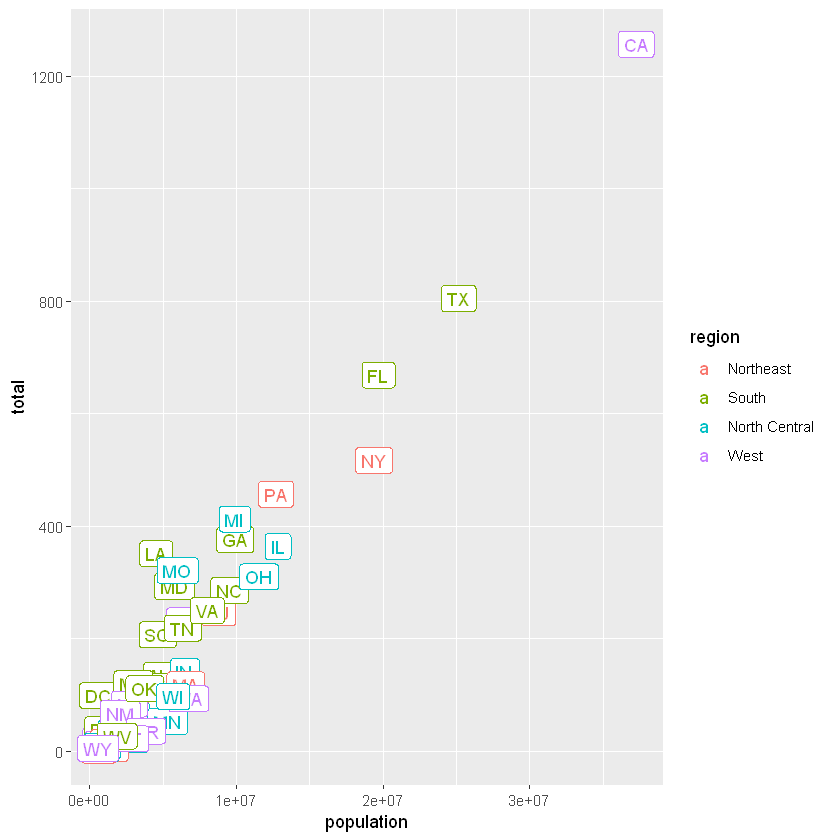

In [56]:
source("./Scripts/2/Ejercicio7.r", print.eval = TRUE)

### Ejercicio 8: Escala log

14. Ahora vamos a cambiar el eje-x a una escala logar√≠tmica para tomar en cuenta el hecho de que la distribuci√≥n de la poblaci√≥n es asim√©trica. Comencemos definiendo un objeto `p` guardando el gr√°fico que hemos hecho hasta ahora:

```r
p <- murders %>%
ggplot(aes(population, total, label = abb, color = region)) +
geom_label()
```

Para cambiar el eje-y a una escala logar√≠tmica, aprendimos sobre la funci√≥n `scale_x_log10()`.

Agregue esta capa al objeto p para cambiar la escala y crear el gr√°fico.

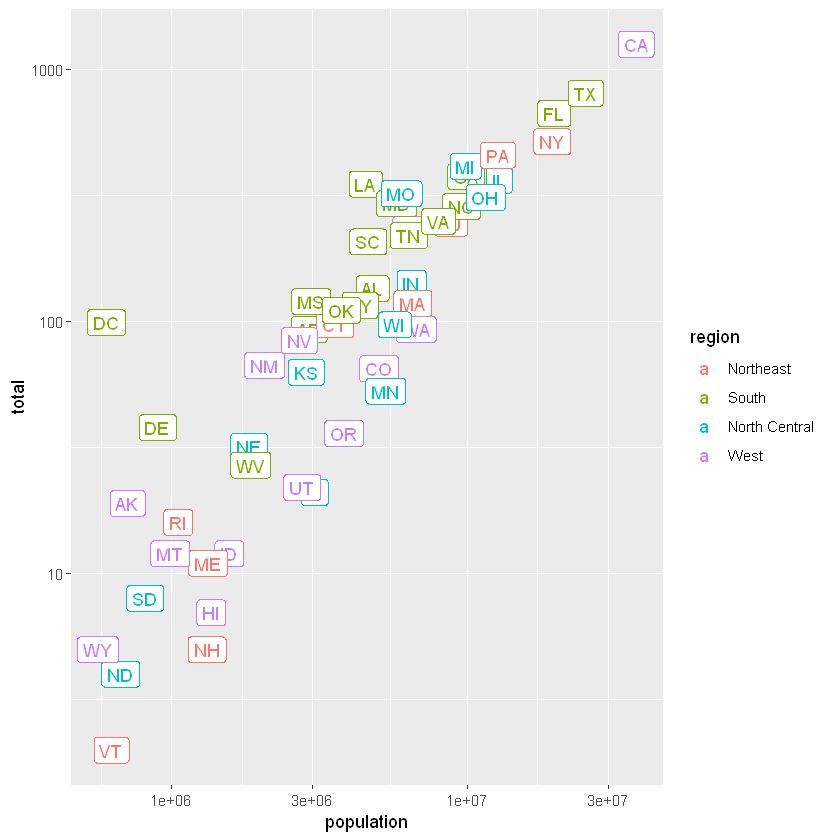

In [57]:
source("./Scripts/2/Ejercicio8.r", print.eval = TRUE)

### Ejercicio 9: T√≠tulos

Ahora edite el c√≥digo anterior para a√±adir el t√≠tulo ‚ÄúGun murder data‚Äù al argumento.

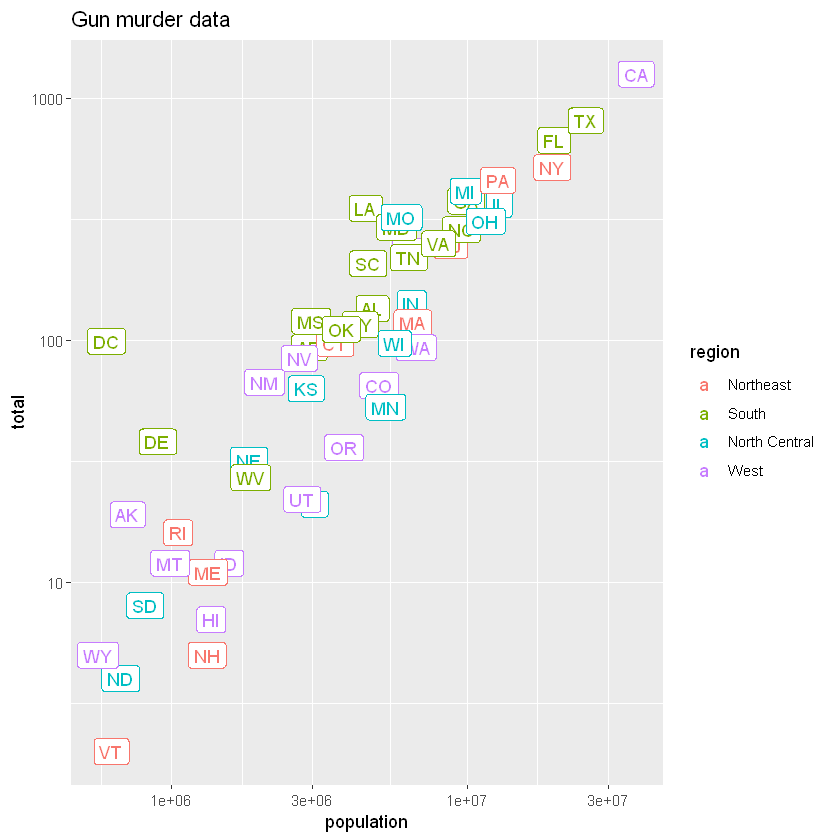

In [58]:
source("./Scripts/2/Ejercicio9.r", print.eval = TRUE)

### Ejercicio 10: Un segundo ejemplo

Ahora vamos a hacer un histograma de las alturas, as√≠ que cargaremos el conjunto de datos de alturas. El siguiente c√≥digo se ejecut√≥ previamente para que pueda cargar el conjunto de datos de alturas:

```r
library(dplyr)
library(ggplot2)
library(dslabs)
data(heights)
```

Cree un objeto `ggplot` llamado `p` usando pipe para asignar los datos de `heights` a un objeto `ggplot`.
Asigne `height` a los valores de `x` a trav√©s de la funci√≥n `aes`.

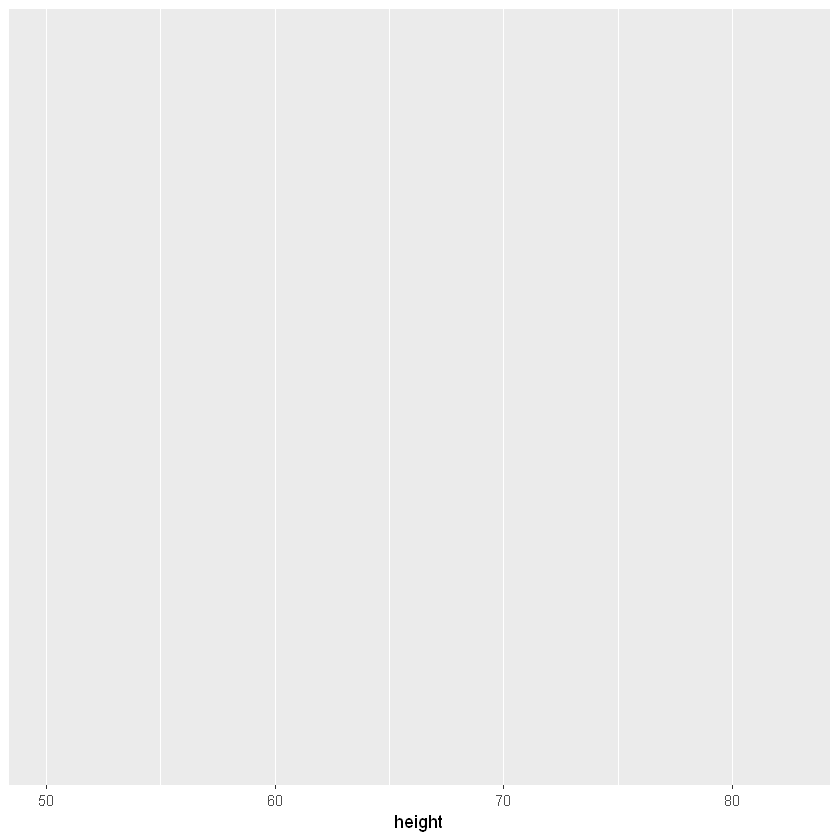

In [59]:
source("./Scripts/2/Ejercicio10.r", print.eval = TRUE)

### Ejercicio 11: Histogramas 2

Agregue una capa al objeto `p` creado anteriormente usando la funci√≥n `geom_histogram` para crear un histograma

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


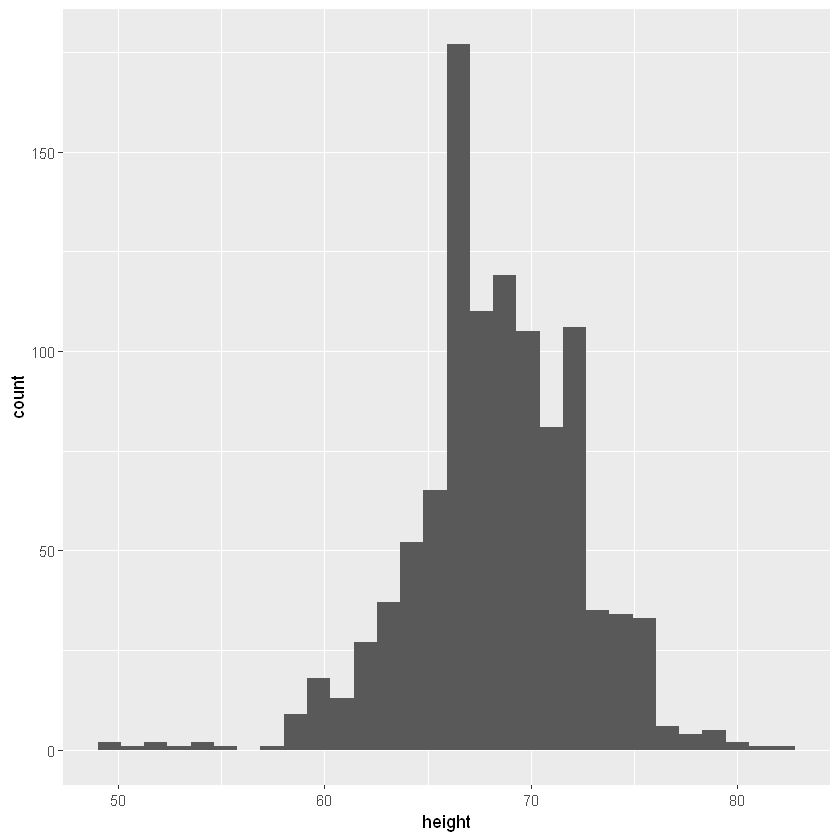

In [61]:
source("./Scripts/2/Ejercicio11.r", print.eval = TRUE)

### Ejercicio 12: Histograma `binwidth`

Tenga en cuenta que cuando ejecutamos el c√≥digo del ejercicio anterior obtenemos la siguiente advertencia:

> *stat_bin() using bins = 30. Pick better value with binwidth.*
> 

Use el argumento `binwidth` para cambiar el histograma realizado en el ejercicio anterior para usar bins de tama√±o de 1 pulgada.

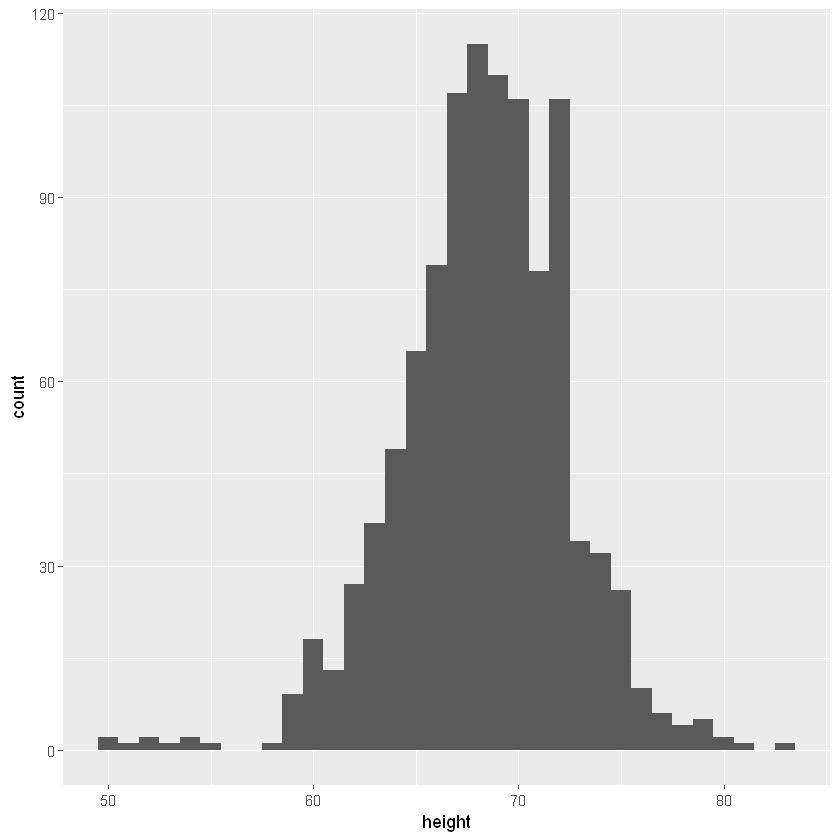

In [62]:
source("./Scripts/2/Ejercicio12.r", print.eval = TRUE)

### Ejercicio 13. Diagrama de densidad suave

Ahora, en lugar de un histograma, vamos a hacer un gr√°fico de densidad suave. En este caso, no haremos un objeto p. En su lugar, representaremos la trama usando una sola l√≠nea de c√≥digo. En el ejercicio anterior, podr√≠amos haber creado un histograma usando una l√≠nea de c√≥digo como esta:

```r
heights %>% 
  ggplot(aes(height)) +
  geom_histogram()
```

Ahora, en lugar de `geom_histogram`, usaremos `geom_density` para crear un gr√°fico de densidad suave.

Agregue la capa adecuada para crear un diagrama de alturas de densidad suave.

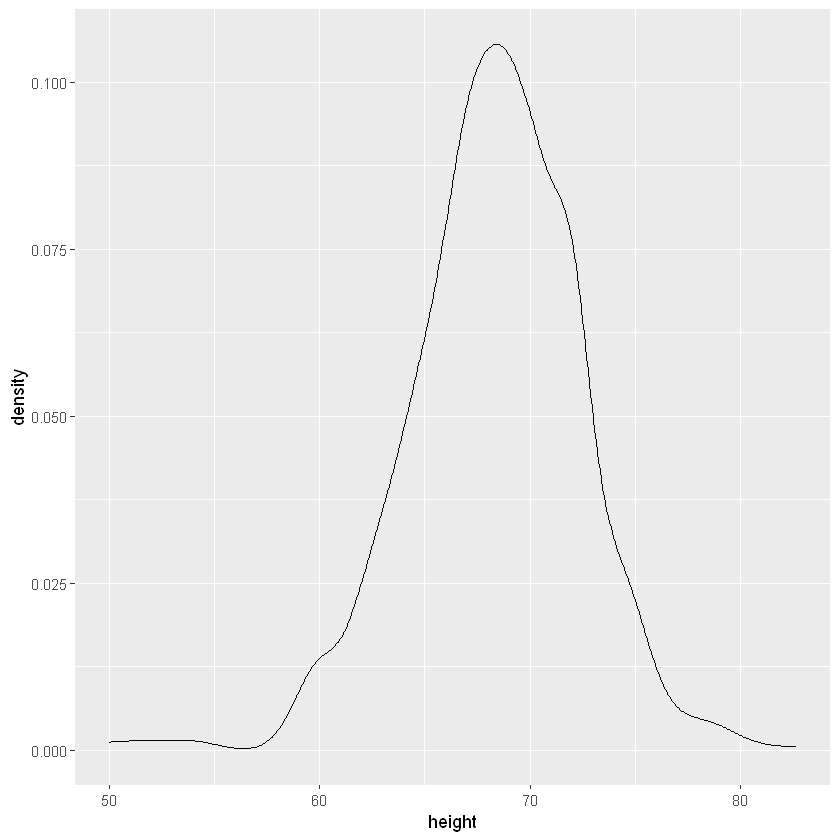

In [63]:
source("./Scripts/2/Ejercicio13.r", print.eval = TRUE)

### Ejercicio 14. Dos gr√°ficas de densidad suave

Ahora vamos a hacer diagramas de densidad para `males` y `females` por separado. 

Podemos hacer esto usando el argumento `grup` dentro del mapeo `aes`. 

Debido a que a cada punto se le asignar√° una densidad diferente seg√∫n una variable del conjunto de datos, debemos mapear dentro de `aes`.

Cree gr√°ficos de densidad suave separadas para hombres y mujeres definiendo grupos por sexo. 

Use la funci√≥n `aes` existente dentro de la funci√≥n `ggplot`.

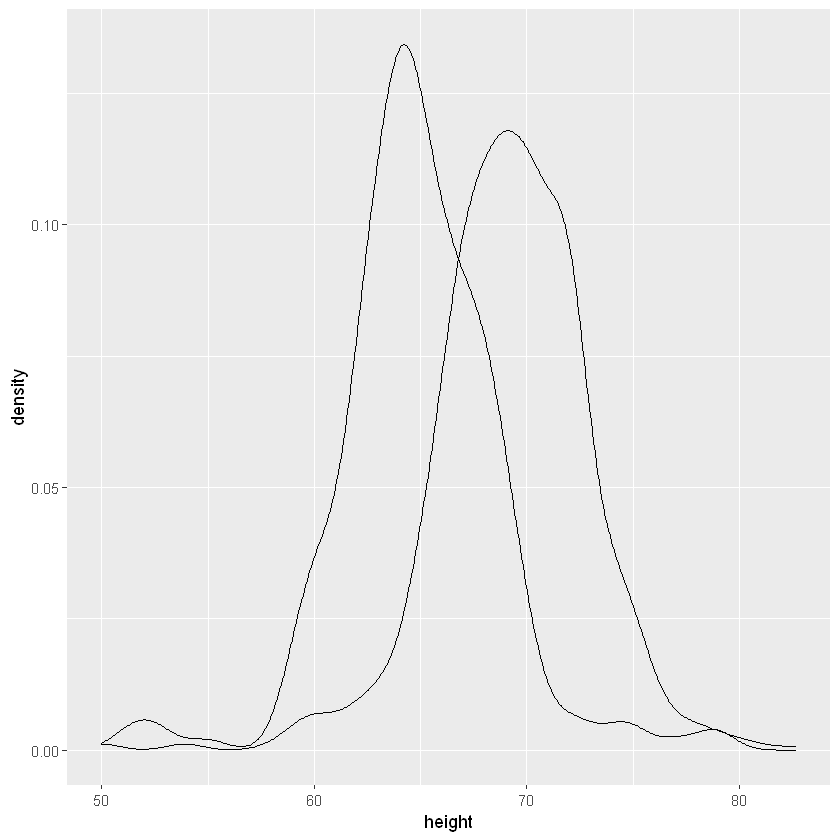

In [64]:
source("./Scripts/2/Ejercicio14.r", print.eval = TRUE)

### Ejercicio 15. Dos gr√°ficas de densidad suave 2

En el ejercicio anterior hicimos las dos gr√°ficas de densidad, una para cada sexo, usando:

```r
heights %>% 
  ggplot(aes(height, group = sex)) + 
  geom_density()
```

Tambi√©n podemos asignar grupos a trav√©s del argumento `color` o `fill`. Por ejemplo, si escribe `color = sex`, `ggplot` sabe que desea un color diferente para cada sexo. Entonces se deben dibujar dos densidades. Por lo tanto, puede omitir el mapeo de `grup = sex`. El uso del color tiene el beneficio adicional de que usa el color para distinguir los grupos.

Cambie las gr√°ficas de densidad del ejercicio anterior para agregar color.

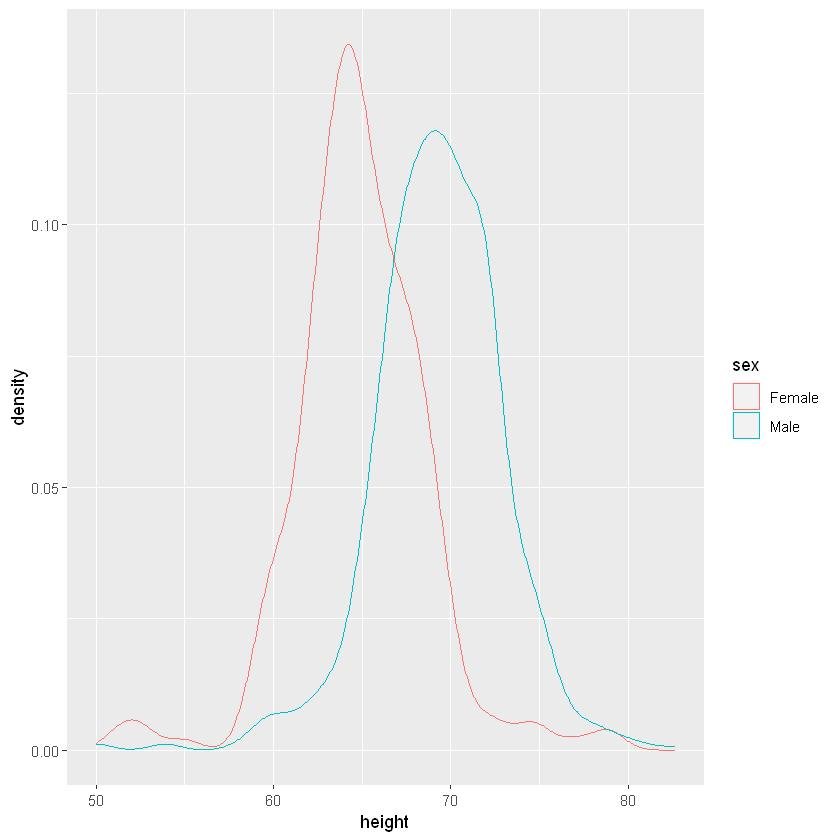

In [65]:
source("./Scripts/2/Ejercicio15.r", print.eval = TRUE)

### Ejercicio 16. Dos gr√°ficas de densidad suave 3

Tambi√©n podemos asignar grupos usando el argumento `fill`. Cuando usamos la geometr√≠a `geom_density`, `color` crea una l√≠nea de color para la grafica de densidad, mientras que `fill` colorea debajo de la curva.

Podemos observar como es esto con el siguiente c√≥digo:

```r
heights %>% 
  ggplot(aes(height, fill = sex)) + 
  geom_density()
```

Sin embargo, la segunda densidad es dibujada sobre la otra. Podemos cambiar esto usando algo llamado `alpha blending` (mezcla alpha).

Defina el par√°metro `alpha` en 0.2 en la funci√≥n `geom_density` para hacer este cambio

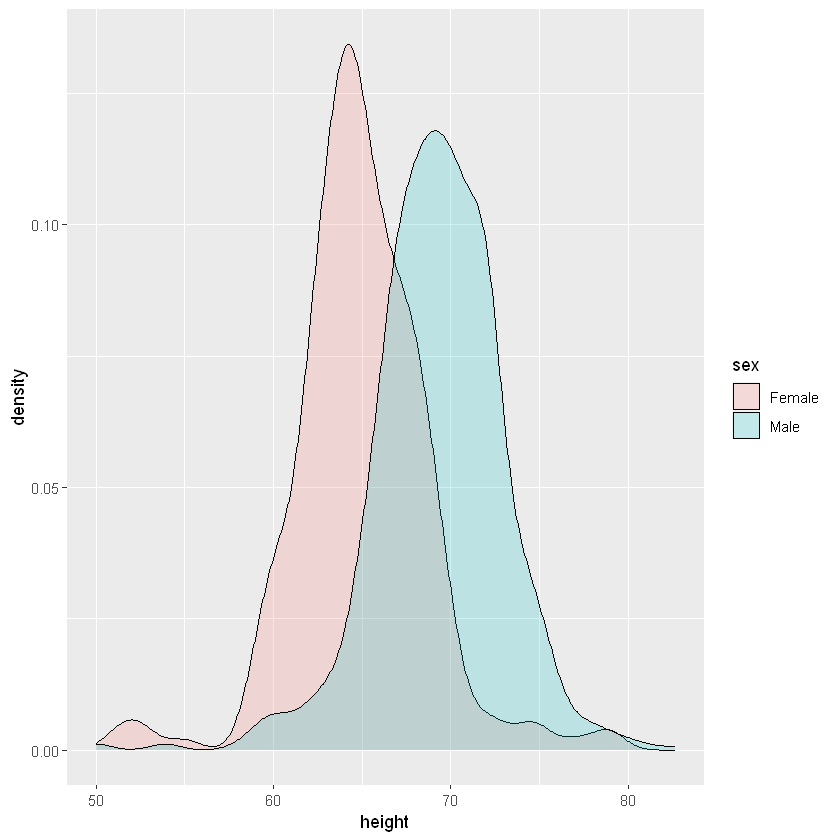

In [66]:
source("./Scripts/2/Ejercicio16.r", print.eval = TRUE)